# Feature Selection


In [136]:
# loading necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt



# 1. Data

In [137]:
data = pd.read_csv('thl_recoded.csv')
data.head()

,kannabis,k9,k12,alcohol_use,k21a,k21b,risk_of_use,risk_of_try,cannabis_access,other_access,...,k70b_3.0,k70b_4.0,k70c_2.0,k70c_3.0,k70c_4.0,k70d_2.0,k70d_3.0,k70d_4.0,k70e_3.0,k70e_4.0
0,0.0,4.0,4.0,7.0,2.0,1.0,20.0,13.0,2.0,2.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.0,3.0,3.0,6.0,3.0,3.0,22.0,14.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.0,5.0,5.0,7.0,3.0,2.0,21.0,13.0,2.0,3.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.0,3.0,5.0,6.0,2.0,1.0,22.0,11.0,3.0,3.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,3.0,5.0,6.0,2.0,3.0,21.0,12.0,1.0,3.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [138]:
 # Kannabis use
data['kannabis'].value_counts(normalize= True)

0.0    0.934577
1.0    0.065423
Name: kannabis, dtype: float64

## 1.1. Outliers

In [139]:
def outlier(df, variable_list):
    from collections import Counter
    outlier_indexes = []
    
    for i in variable_list:
        
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)


        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR

        total_filter = ((df[i] < lower_bound) | (df[i] > upper_bound))

        outlier_observation = df[i][total_filter]
        outlier_index = outlier_observation.index
        
        outlier_indexes.extend(outlier_index)
        
    outlier_indexes = Counter(outlier_indexes)
    
    common_index = [i for i, v in outlier_indexes.items() if v > 0]
    
    return common_index

In [140]:
numeric_list = ['k9', 'k12','alcohol_use', 'k21a', 'k21b', 'risk_of_use', 'risk_of_try', 
'cannabis_access', 'other_access', 'doping_access', 'k66', 'k68', 'k72' ]
outlier_rows = outlier(data, numeric_list)

In [141]:
data.loc[outlier_rows]

,kannabis,k9,k12,alcohol_use,k21a,k21b,risk_of_use,risk_of_try,cannabis_access,other_access,...,k70b_3.0,k70b_4.0,k70c_2.0,k70c_3.0,k70c_4.0,k70d_2.0,k70d_3.0,k70d_4.0,k70e_3.0,k70e_4.0
17,0.0,1.0,5.0,7.0,3.0,2.0,19.0,10.0,3.0,2.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
27,1.0,2.0,4.0,7.0,2.0,1.0,21.0,8.0,2.0,4.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
29,0.0,1.0,4.0,6.0,3.0,3.0,21.0,14.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
36,0.0,1.0,5.0,2.0,3.0,3.0,22.0,13.0,3.0,4.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
43,1.0,1.0,1.0,7.0,2.0,3.0,19.0,10.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3230,0.0,4.0,5.0,5.0,3.0,2.0,23.0,13.0,3.0,3.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3234,0.0,5.0,5.0,9.0,3.0,2.0,20.0,14.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3239,0.0,5.0,5.0,6.0,3.0,3.0,24.0,14.0,3.0,3.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3247,0.0,4.0,5.0,3.0,3.0,1.0,20.0,14.0,4.0,4.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


Although variables' values in scale format, this method detect to many outlierns, around 2/3 of the data. We can use robust scaling to normalize the data in later stage. 

## 1.2. Data Split

In [142]:
from sklearn.model_selection import train_test_split

X, y = data.iloc[:, 1:].values, data.iloc[:, 0].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

In [143]:
print('Dimension of X train: ', X_train.shape)
print('Target 1: ', np.count_nonzero(y_train == 1))
print('Target 0: ', np.count_nonzero(y_train == 0))



print('\n ---------------------\n')
print('Dimension of X test :', X_test.shape)
print('Target 1: ', np.count_nonzero(y_test == 1))
print('Target 0: ', np.count_nonzero(y_test == 0))




Dimension of X train:  (2439, 60)
Target 1:  160
Target 0:  2279

 ---------------------

Dimension of X test : (1046, 60)
Target 1:  68
Target 0:  978


## 1.3. Scaling

Robust Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).




In [144]:
from sklearn.preprocessing import RobustScaler

robust = RobustScaler()
X_train_std = robust.fit_transform(X_train)
X_test_std = robust.transform(X_test)

# 2. Univariate Statistics - Filter Methods

Our main aim to find out statistically significant / meaningful relationship between features and target.

In this part, we will look at the different methods under the filter methods.

- Removing features with low variance 
- Variance Threshold
- KBest models for both classification and regression problems
- Information gain for both classification and regression problems
- Select percentile

## 2.1. Removing features with low variance - Variance Threshold

Variance threshold allows us to set a minimum threshold for an accepted variance in each feature. As a default it removes all zero-variance features (same value in all samples).

In [167]:
from sklearn.feature_selection import VarianceThreshold

vth = VarianceThreshold(threshold=0)  # as deafult threshold=0
vth.fit(X_train_std)
data.columns[1:]
X_train_vth = X_train_std[:, vth.get_support()]

# since we use array, we pull column names from the original df
d1 = data.columns.tolist()
d1 = d1[1:]
d1

pd.DataFrame( {'Feature': d1[i],'Variance': vth.variances_,}).sort_values('Variance', ascending=True)

,Feature,Variance
49,k70e_4.0,0.009743
55,k70e_4.0,0.010546
40,k70e_4.0,0.016131
52,k70e_4.0,0.018504
23,k70e_4.0,0.046780
16,k70e_4.0,0.047887
46,k70e_4.0,0.053379
42,k70e_4.0,0.058795
39,k70e_4.0,0.067304
36,k70e_4.0,0.072524


None of our features have a zero variance, for that reason we didn't remove any of our features.


## 2.2. Select KBest for Classification Problems

Feature 0 : 134.501
Feature 1 : 297.342
Feature 2 : 26.407
Feature 3 : 133.811
Feature 4 : 9.629
Feature 5 : 108.483
Feature 6 : 170.855
Feature 7 : 4.039
Feature 8 : 1.904
Feature 9 : 0.826
Feature 10 : 45.725
Feature 11 : 1.563
Feature 12 : 3.47
Feature 13 : 33.198
Feature 14 : 320.936
Feature 15 : 16.19
Feature 16 : 318.584
Feature 17 : 180.001
Feature 18 : 10.448
Feature 19 : 28.348
Feature 20 : 309.15
Feature 21 : 66.237
Feature 22 : 25.165
Feature 23 : 47.872
Feature 24 : 251.347
Feature 25 : 304.504
Feature 26 : 12.697
Feature 27 : 12.886
Feature 28 : 13.503
Feature 29 : 2.473
Feature 30 : 15.742
Feature 31 : 50.988
Feature 32 : 1.7
Feature 33 : 0.268
Feature 34 : 4.615
Feature 35 : 1.504
Feature 36 : 4.015
Feature 37 : 4.111
Feature 38 : 60.447
Feature 39 : 3.131
Feature 40 : 1.093
Feature 41 : 23.504
Feature 42 : 7.229
Feature 43 : 14.868
Feature 44 : 2.356
Feature 45 : 2.177
Feature 46 : 10.064
Feature 47 : 4.215
Feature 48 : 19.253
Feature 49 : 62.503
Feature 50 : 165.543
Fe

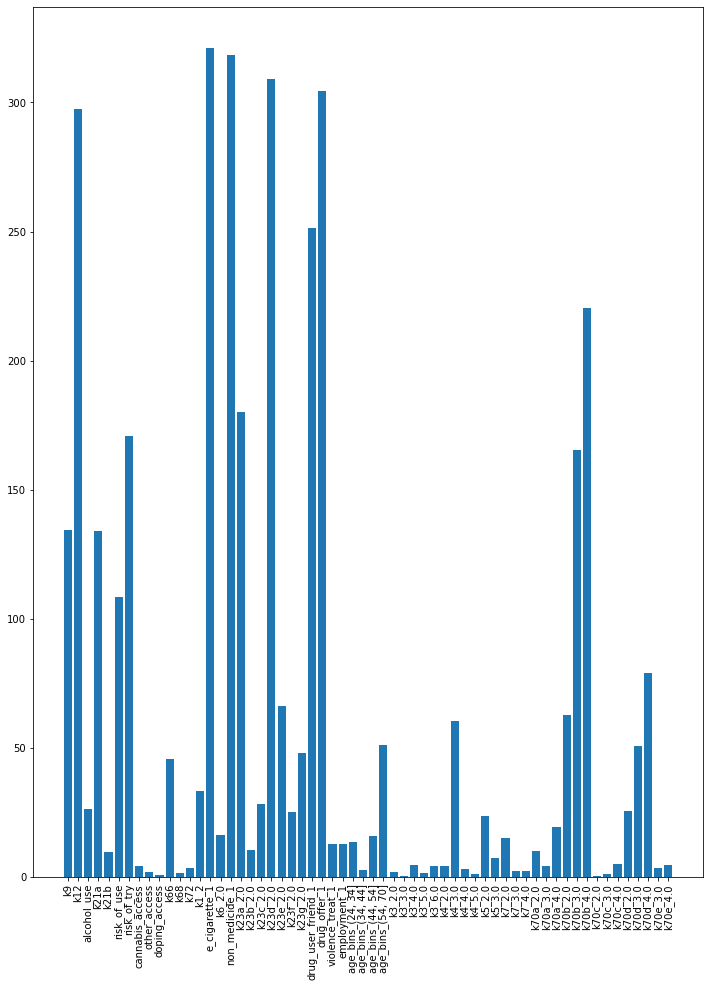

In [168]:
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif,f_regression
Kbest_classif = SelectKBest(score_func=f_classif, k=6)
Kbest_classif.fit(X_train_std, y_train)

# what are scores for the features
for i in range(len(Kbest_classif.scores_)):
    print(f'Feature {i} : {round(Kbest_classif.scores_[i],3)}')

print()

plt.bar([d1[ i] for i in range(len(Kbest_classif.scores_))], Kbest_classif.scores_)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (12,16)
plt.show()


## 2.3. Select KBest for Regression Problems

Feature 0 : 134.501
Feature 1 : 297.342
Feature 2 : 26.407
Feature 3 : 133.811
Feature 4 : 9.629
Feature 5 : 108.483
Feature 6 : 170.855
Feature 7 : 4.039
Feature 8 : 1.904
Feature 9 : 0.826
Feature 10 : 45.725
Feature 11 : 1.563
Feature 12 : 3.47
Feature 13 : 33.198
Feature 14 : 320.936
Feature 15 : 16.19
Feature 16 : 318.584
Feature 17 : 180.001
Feature 18 : 10.448
Feature 19 : 28.348
Feature 20 : 309.15
Feature 21 : 66.237
Feature 22 : 25.165
Feature 23 : 47.872
Feature 24 : 251.347
Feature 25 : 304.504
Feature 26 : 12.697
Feature 27 : 12.886
Feature 28 : 13.503
Feature 29 : 2.473
Feature 30 : 15.742
Feature 31 : 50.988
Feature 32 : 1.7
Feature 33 : 0.268
Feature 34 : 4.615
Feature 35 : 1.504
Feature 36 : 4.015
Feature 37 : 4.111
Feature 38 : 60.447
Feature 39 : 3.131
Feature 40 : 1.093
Feature 41 : 23.504
Feature 42 : 7.229
Feature 43 : 14.868
Feature 44 : 2.356
Feature 45 : 2.177
Feature 46 : 10.064
Feature 47 : 4.215
Feature 48 : 19.253
Feature 49 : 62.503
Feature 50 : 165.543
Fe

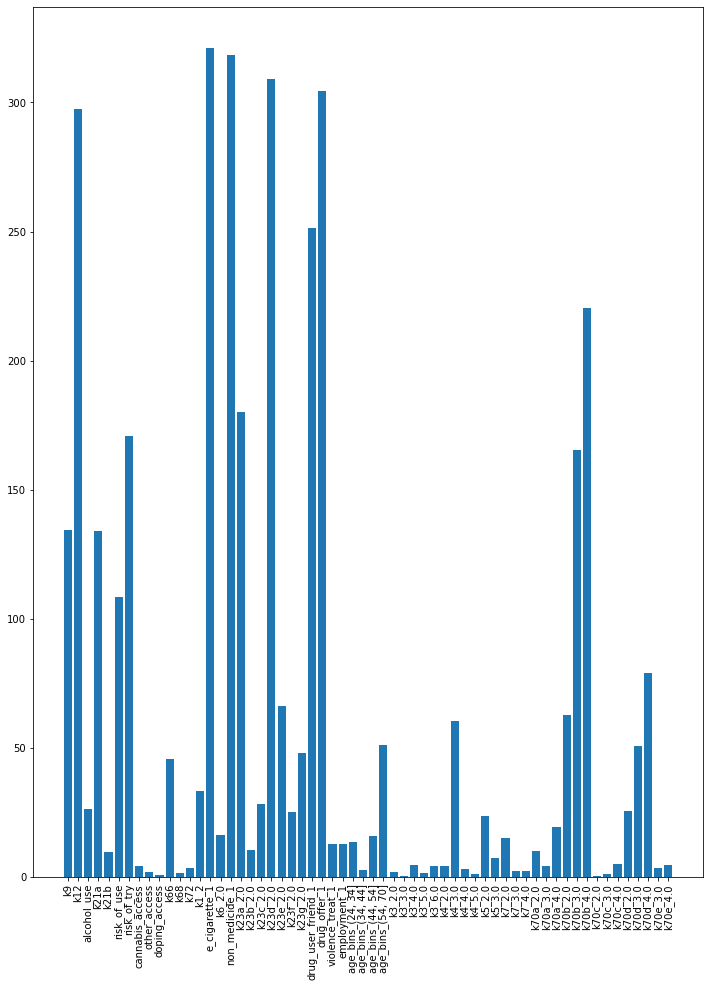

In [169]:
Kbest_reg = SelectKBest(score_func=f_regression, k=6)
Kbest_reg.fit(X_train_std, y_train)



# what are scores for the features
for i in range(len(Kbest_reg.scores_)):
    print(f'Feature {i} : {round(Kbest_reg.scores_[i],3)}')

print()


# plot the scores
plt.bar([d1[i] for i in range(len(Kbest_reg.scores_))], Kbest_reg.scores_)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (8,6)
plt.show()

## 2.4. Information Gain - Classification Problems

Feature 0 : 0.027
Feature 1 : 0.046
Feature 2 : 0.008
Feature 3 : 0.03
Feature 4 : 0.0
Feature 5 : 0.04
Feature 6 : 0.038
Feature 7 : 0.06
Feature 8 : 0.018
Feature 9 : 0.0
Feature 10 : 0.01
Feature 11 : 0.0
Feature 12 : 0.0
Feature 13 : 0.016
Feature 14 : 0.041
Feature 15 : 0.003
Feature 16 : 0.022
Feature 17 : 0.05
Feature 18 : 0.004
Feature 19 : 0.005
Feature 20 : 0.048
Feature 21 : 0.021
Feature 22 : 0.0
Feature 23 : 0.001
Feature 24 : 0.054
Feature 25 : 0.063
Feature 26 : 0.006
Feature 27 : 0.005
Feature 28 : 0.003
Feature 29 : 0.0
Feature 30 : 0.0
Feature 31 : 0.01
Feature 32 : 0.0
Feature 33 : 0.0
Feature 34 : 0.0
Feature 35 : 0.01
Feature 36 : 0.008
Feature 37 : 0.0
Feature 38 : 0.018
Feature 39 : 0.0
Feature 40 : 0.0
Feature 41 : 0.004
Feature 42 : 0.0
Feature 43 : 0.0
Feature 44 : 0.0
Feature 45 : 0.0
Feature 46 : 0.005
Feature 47 : 0.0
Feature 48 : 0.009
Feature 49 : 0.001
Feature 50 : 0.028
Feature 51 : 0.045
Feature 52 : 0.008
Feature 53 : 0.004
Feature 54 : 0.0
Feature 55

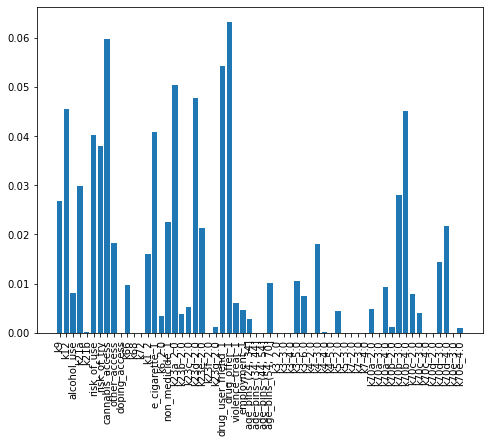

In [172]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression,mutual_info_classif
infogain_classif = SelectKBest(score_func=mutual_info_classif, k=6)

infogain_classif.fit(X_train_std, y_train)



# what are scores for the features
for i in range(len(infogain_classif.scores_)):
    print(f'Feature {i} : {round(infogain_classif.scores_[i],3)}')


print()

# plot the scores
plt.bar([d1[i] for i in range(len(infogain_classif.scores_))], infogain_classif.scores_)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (8,6)
plt.show()

## 2.5. Information Gain- Regression Problems

Feature 0: 0.023461
Feature 1: 0.048296
Feature 2: 0.017888
Feature 3: 0.027472
Feature 4: 0.000000
Feature 5: 0.010929
Feature 6: 0.039834
Feature 7: 0.040954
Feature 8: 0.021106
Feature 9: 0.000000
Feature 10: 0.000000
Feature 11: 0.031690
Feature 12: 0.000000
Feature 13: 0.011867
Feature 14: 0.056515
Feature 15: 0.002022
Feature 16: 0.066525
Feature 17: 0.070115
Feature 18: 0.013897
Feature 19: 0.001900
Feature 20: 0.059599
Feature 21: 0.021935
Feature 22: 0.000935
Feature 23: 0.000000
Feature 24: 0.076627
Feature 25: 0.064505
Feature 26: 0.021417
Feature 27: 0.000000
Feature 28: 0.000000
Feature 29: 0.000000
Feature 30: 0.005671
Feature 31: 0.032417
Feature 32: 0.016762
Feature 33: 0.000000
Feature 34: 0.000000
Feature 35: 0.026065
Feature 36: 0.004829
Feature 37: 0.005374
Feature 38: 0.015990
Feature 39: 0.000000
Feature 40: 0.000000
Feature 41: 0.012282
Feature 42: 0.006511
Feature 43: 0.002431
Feature 44: 0.001666
Feature 45: 0.024555
Feature 46: 0.000000
Feature 47: 0.003353
Fe

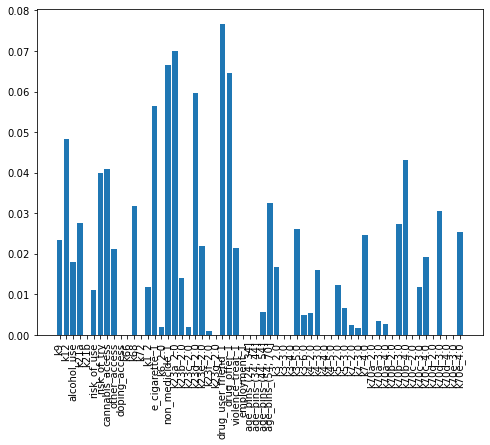

In [175]:
Kbest_reg = SelectKBest(score_func=f_regression, k=6)
Kbest_reg.fit(X_train_std, y_train)



infogain_reg = SelectKBest(score_func=mutual_info_regression, k=6)

infogain_reg.fit(X_train_std, y_train)



# what are scores for the features
for i in range(len(infogain_reg.scores_)):
    print('Feature %d: %f' % (i, infogain_reg.scores_[i]))


# plot the scores
plt.bar([d1[i] for i in range(len(infogain_reg.scores_))], infogain_reg.scores_)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (8,6)
plt.show()

## 2.6. Select Percentile

In [176]:
percentile = SelectPercentile(percentile=50)
percentile.fit(X_train_std, y_train)
percentile.get_support()

array([ True,  True,  True,  True, False,  True,  True, False, False,
       False,  True, False, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False,  True,  True,  True,  True, False, False,
       False,  True,  True,  True, False, False])

In [178]:
pd.DataFrame(percentile.get_support(), index=data.columns[1:],columns=['Rank'])

,Rank
k9,True
k12,True
alcohol_use,True
k21a,True
k21b,False
risk_of_use,True
risk_of_try,True
cannabis_access,False
other_access,False
doping_access,False


In [181]:
rf_df = pd.DataFrame(percentile.get_support(),index=data.columns[1:],columns=['Rank']).sort_values(by='Rank',ascending=False)
rf_df.head(20)

,Rank
k9,True
k4_3.0,True
k23e_2.0,True
k23f_2.0,True
k23g_2.0,True
drug_user_friend_1,True
drug_offer_1,True
k12,True
"age_bins_(54, 70]",True
k5_2.0,True


# 3. L1 and L2 regularization as penalties against model complexity


In [49]:
from sklearn.linear_model import LogisticRegression

LogisticRegression(penalty='l1')

LogisticRegression(penalty='l1')

In [50]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', multi_class='ovr')
# Note that C=1.0 is the default. You can increase
# or decrease it to make the regulariztion effect
# stronger or weaker, respectively.
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 0.965969659696597
Test accuracy: 0.9550669216061185


In [51]:
lr.intercept_

array([-7.24101131])

Since we have only one class in target, it gives us only one value, which can also interpreted as coeffient. 

In [52]:
np.set_printoptions(8)


In [53]:
lr.coef_[lr.coef_!=0].shape



(42,)

In [54]:
lr.coef_

array([[-0.2517921 , -0.12551702,  0.37307182, -0.4057027 ,  0.09004536,
        -0.01445631, -0.36734124, -0.40515194,  0.21862383,  0.33884384,
        -0.36240513, -0.31363662, -0.04390205,  0.        ,  0.63870079,
         0.64525793,  0.74238011,  0.        ,  0.04436819,  0.01012575,
        -0.98854919,  0.        ,  0.        ,  0.        ,  2.01913623,
         1.7079767 ,  0.09419046, -0.15499513, -0.55570512, -0.40068943,
        -0.08779023, -1.3219283 , -0.03430738, -0.07769061,  0.        ,
        -0.01325013,  0.        , -0.38002335, -0.55082018,  0.        ,
         0.        ,  0.23148495,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.64226302, -0.28586654,  0.        ,
         1.06199676, -1.60708724,  0.        , -0.36249955,  0.61835481,
         0.        , -0.22542311, -0.77449862,  0.        ,  0.83060965]])

As we can see, all feature weights will be zero if we penalize the model with a strong regularization parameter (C < 0.01); C is the inverse of the regularization parameter, 𝜆:

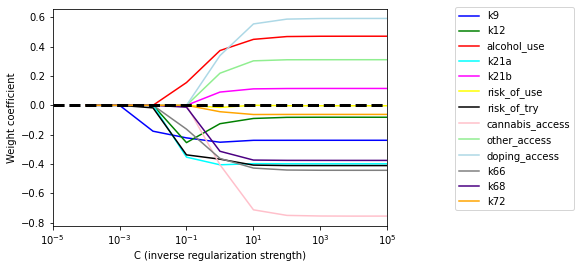

In [60]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear', #  C=10.**c,
                             random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[0])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=data.columns[column + 1],
             color=color)

    
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('Weight coefficient')
plt.xlabel('C (inverse regularization strength)')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)

#plt.savefig('figures/04_08.png', dpi=300, 
#            bbox_inches='tight', pad_inches=0.2)

plt.show()

# 4. Sequential feature selection algorithms

A classic sequential feature selection algorithm is sequential backward selection (SBS), which aims to reduce the dimensionality of the initial feature subspace with a minimum decay in the performance of the classifier to improve upon computational efficiency. 

The idea behind the SBS algorithm is quite simple: SBS sequentially removes features from the full feature subset until the new feature subspace contains the desired number of features. In order to determine which feature is to be removed at each stage, we need to define the criterion function, J, that we want to minimize.

In [61]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS:
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score



We defined the k_features parameter to specify the desired number of features we want to return. By default, we use the accuracy_score from scikit-learn to evaluate the performance of a model (an estimator for classification) on the feature subsets.

Our SBS algorithm collects the scores of the best feature subset at each stage, so let's move on to the more exciting part of our implementation and plot the classification accuracy of the KNN classifier that was calculated on the validation dataset. 

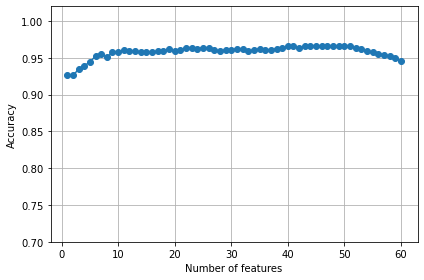

In [62]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('figures/04_09.png', dpi=300)
plt.show()

To satisfy our own curiosity, let's see what the smallest feature subset (k=3), which yielded such a good performance on the validation dataset.



In [64]:
k3 = list(sbs.subsets_[50])
print('Number of indicators: ', len(k3))

print('------------------ \n')
print(data.columns[1:][k3])

Number of indicators:  10
------------------ 

Index(['k9', 'k21a', 'doping_access', 'k68', 'k72', 'k1_2', 'k23d_2.0',
       'drug_user_friend_1', 'k70b_4.0', 'k70c_3.0'],
      dtype='object')


Using the preceding code, we obtained the column indices of the three-feature subset from the 50th position in the sbs.subsets_ attribute and returned the corresponding feature names from the column index of the pandas Wine DataFrame.

Next, let's evaluate the performance of the KNN classifier on the original test dataset:

In [65]:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.964329643296433
Test accuracy: 0.9474187380497132


In the preceding code section, we used the complete feature set and obtained approximately 96 percent accuracy on the training dataset and approximately 95 percent accuracy on the test dataset, which indicates that our model already generalizes well to new data. 

Now, let's use the selected three-feature subset and see how well KNN performs:

In [67]:
knn.fit(X_train_std[:, k3], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k3], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k3], y_test))

Training accuracy: 0.9622796227962279
Test accuracy: 0.9359464627151052


When using less than a quarter of the original features in our dataset, the prediction accuracy on the test dataset degreaaed slightly but only with 10 features out of 60, it is pretty good. 

# 5. Assessing feature importance with Random Forests


In [73]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = data.columns[1:]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train_std, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

In [74]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) k12                            0.058452
 2) risk_of_try                    0.053615
 3) k70b_4.0                       0.049464
 4) risk_of_use                    0.047774
 5) k23d_2.0                       0.045268
 6) drug_user_friend_1             0.042249
 7) drug_offer_1                   0.040746
 8) k9                             0.038408
 9) non_medicide_1                 0.036318
10) e_cigarette_1                  0.035642
11) k70b_3.0                       0.033849
12) cannabis_access                0.032290
13) alcohol_use                    0.028973
14) k21a                           0.027363
15) k72                            0.022627
16) doping_access                  0.021228
17) other_access                   0.021210
18) k68                            0.019538
19) k70c_4.0                       0.018709
20) k66                            0.018498
21) k21b                           0.017003
22) k70e_4.0                       0.016037
23) k70e_3.0                    

### Plot the important features

Once the regressor is fitted, the importance of the features is stored inside the feature_importances_ property of the estimator instance.

Let’s, for example, draw a bar chart with the features sorted from the most important to the less important. We’ll have to create a list of tuples. The first element of the tuple is the feature name, the second element is the importance. Then we order our list for importance value and plot a horizontal bar plot.

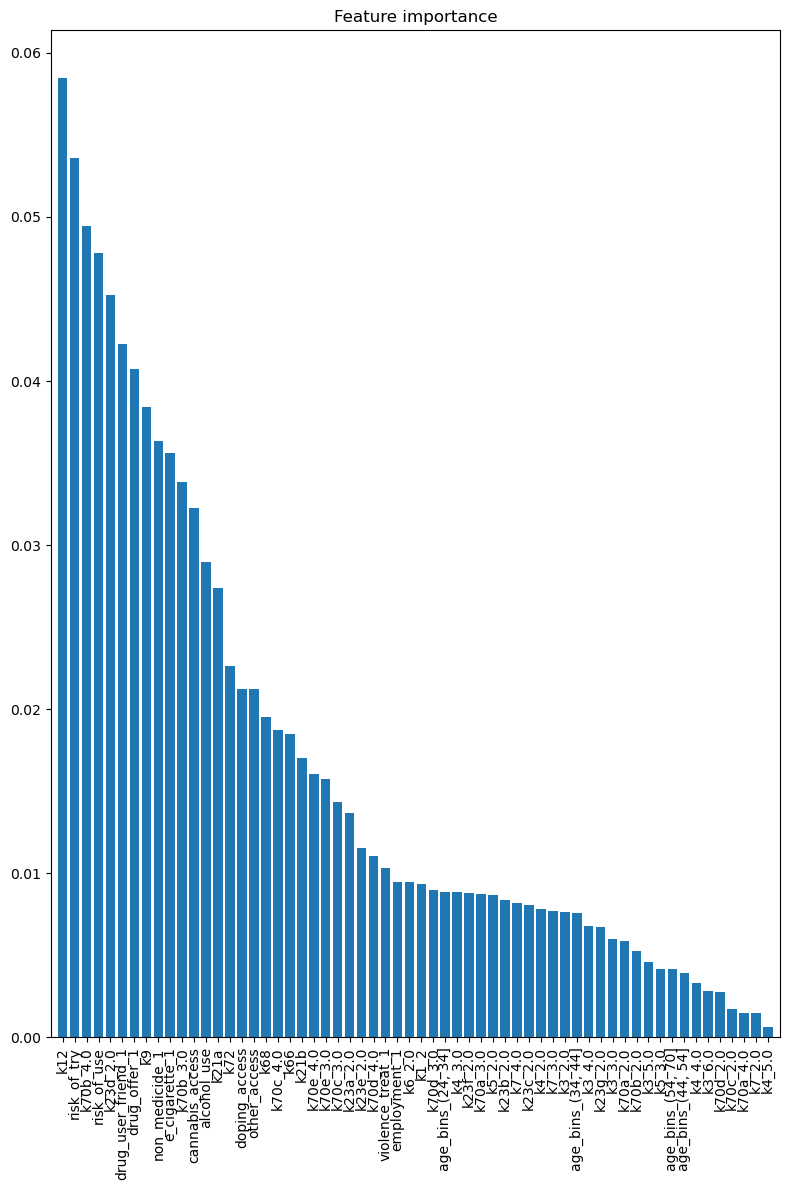

In [75]:
# Plot

from matplotlib.pyplot import figure
figure(figsize=(8, 12), dpi=100)


plt.title('Feature importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
# plt.savefig('figures/04_10.png', dpi=300)



plt.show()



In [77]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.02, prefit=True) # threshold=0.1,
X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold criterion:', 
      X_selected.shape[1])

Number of features that meet this threshold criterion: 17


In [78]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) k12                            0.058452
 2) risk_of_try                    0.053615
 3) k70b_4.0                       0.049464
 4) risk_of_use                    0.047774
 5) k23d_2.0                       0.045268
 6) drug_user_friend_1             0.042249
 7) drug_offer_1                   0.040746
 8) k9                             0.038408
 9) non_medicide_1                 0.036318
10) e_cigarette_1                  0.035642
11) k70b_3.0                       0.033849
12) cannabis_access                0.032290
13) alcohol_use                    0.028973
14) k21a                           0.027363
15) k72                            0.022627
16) doping_access                  0.021228
17) other_access                   0.021210


# 6. Recursive Feature Elimination

Once we have the importance of each feature, we perform feature selection using a procedure called Recursive Feature Elimination. In this article, I’ll talk about the version that makes use of the k-fold cross-validation.

The idea is to fit the model, then remove the less relevant feature and calculate the average value of some performance metric in CV. Then we remove the second last important feature, fit the model again and calculate the average performance. We keep doing this approach until there are no features left. The set of features that maximize the performance in CV is the set of features we have to work with. Please note that the entire procedure needs to work with the same values for the hyperparameters.


Scikit-learn makes it possible to implement recursive feature elimination via the sklearn.feature_selection.RFE class. The class takes the following parameters:

- estimator — a machine learning estimator that can provide features importances via the coef_ or feature_importances_ attributes.
- n_features_to_select — the number of features to select. Selects half if it's not specified.
- step — an integer that indicates the number of features to be removed at each iteration, or a number between 0 and 1 to indicate the percentage of features to remove at each iteration.

Once fitted, the following attributes can be obtained:

- ranking_ — the ranking of the features.
- n_features_ — the number of features that have been selected.
- support_ — an array that indicates whether or not a feature was selected.


## 6.1. RFE - Random Forest 

Now, let’s use feature importance to select the best set of features according to RFE with Cross-Validation. For this example, the metric we try to optimize is the **negative mean squared error**. We’re going to work with 5 folds for the cross-validation, which is a quite good value.

### 6.1.1.  Negative mean squared error

In [79]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

def RFECV_ranking(X,y):
  rf = RandomForestClassifier(n_estimators= 500, random_state=112) # 1500
  rfecv = RFECV(estimator=rf, step=1, cv=StratifiedKFold(5), scoring='neg_mean_squared_error') # 10
  rfecv.fit(X,y)
  
      
  print('Optimal number of features: {}'.format(rfecv.n_features_))
  plt.figure(figsize=(16, 9))
  plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
  plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
  plt.ylabel('Negative mean squared error', fontsize=14, labelpad=20)
  plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)
  plt.show()
  
  features = [f for f,s in zip(data.columns[1:], rfecv.support_) if s]
  return features

Optimal number of features: 43


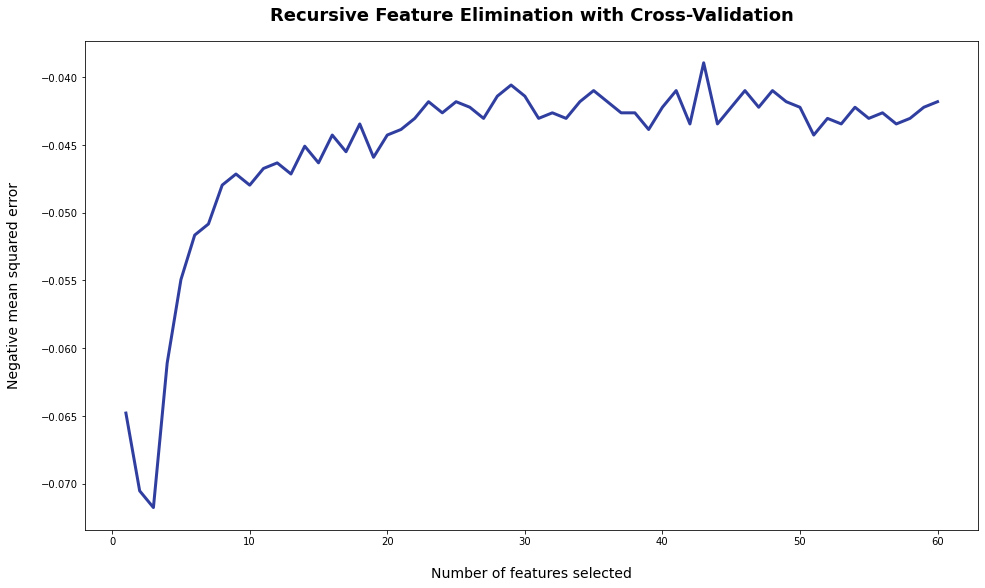

['k9',
 'k12',
 'alcohol_use',
 'k21a',
 'k21b',
 'risk_of_use',
 'risk_of_try',
 'cannabis_access',
 'other_access',
 'doping_access',
 'k66',
 'k68',
 'k72',
 'k1_2',
 'e_cigarette_1',
 'k6_2.0',
 'non_medicide_1',
 'k23a_2.0',
 'k23b_2.0',
 'k23c_2.0',
 'k23d_2.0',
 'k23e_2.0',
 'k23f_2.0',
 'drug_user_friend_1',
 'drug_offer_1',
 'violence_treat_1',
 'employment_1',
 'age_bins_(24, 34]',
 'age_bins_(34, 44]',
 'k3_2.0',
 'k4_2.0',
 'k4_3.0',
 'k5_2.0',
 'k7_3.0',
 'k70a_3.0',
 'k70b_3.0',
 'k70b_4.0',
 'k70c_3.0',
 'k70c_4.0',
 'k70d_3.0',
 'k70d_4.0',
 'k70e_3.0',
 'k70e_4.0']

In [80]:
RFECV_ranking(X_train_std, y_train)

### 6.1.2. Accuracy score

In [81]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

def RFECV_ranking(X,y):
  rf = RandomForestClassifier(n_estimators= 500, random_state=112) # 1500
  rfecv = RFECV(estimator=rf, step=1, cv=StratifiedKFold(5), scoring='accuracy') # 10
  rfecv.fit(X,y)
  
      
  print('Optimal number of features: {}'.format(rfecv.n_features_))
  plt.figure(figsize=(16, 9))
  plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
  plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
  plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
  plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)
  plt.show()
  
  features = [f for f,s in zip(data.columns[1:], rfecv.support_) if s]
  return features

Optimal number of features: 43


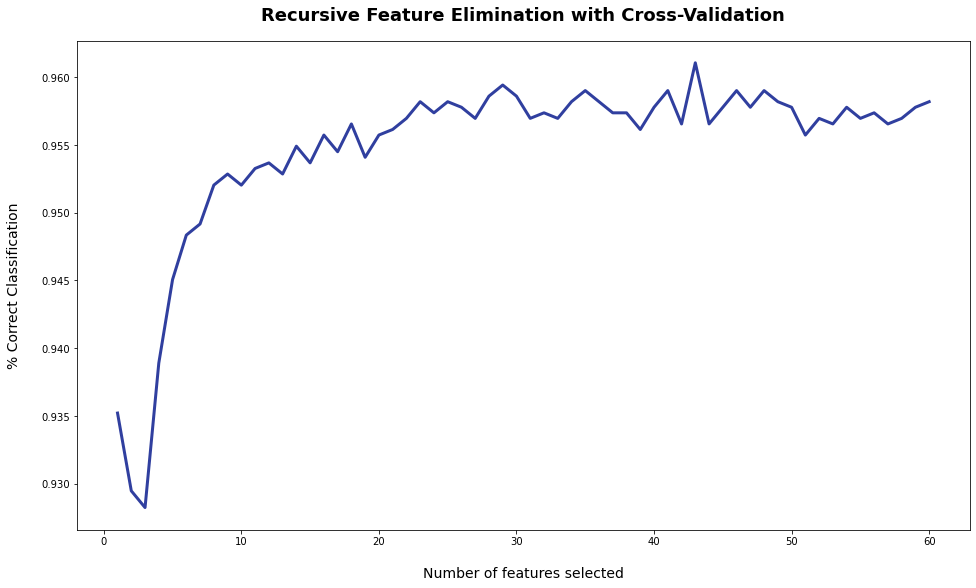

['k9',
 'k12',
 'alcohol_use',
 'k21a',
 'k21b',
 'risk_of_use',
 'risk_of_try',
 'cannabis_access',
 'other_access',
 'doping_access',
 'k66',
 'k68',
 'k72',
 'k1_2',
 'e_cigarette_1',
 'k6_2.0',
 'non_medicide_1',
 'k23a_2.0',
 'k23b_2.0',
 'k23c_2.0',
 'k23d_2.0',
 'k23e_2.0',
 'k23f_2.0',
 'drug_user_friend_1',
 'drug_offer_1',
 'violence_treat_1',
 'employment_1',
 'age_bins_(24, 34]',
 'age_bins_(34, 44]',
 'k3_2.0',
 'k4_2.0',
 'k4_3.0',
 'k5_2.0',
 'k7_3.0',
 'k70a_3.0',
 'k70b_3.0',
 'k70b_4.0',
 'k70c_3.0',
 'k70c_4.0',
 'k70d_3.0',
 'k70d_4.0',
 'k70e_3.0',
 'k70e_4.0']

In [82]:
RFECV_ranking(X_train_std, y_train)

### 6.1.3. F-Scores (f1_macro)

In [83]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

def RFECV_ranking(X,y):
  rf = RandomForestClassifier(n_estimators= 500, random_state=112) # 1500
  rfecv = RFECV(estimator=rf, step=1, cv=StratifiedKFold(5), scoring='f1_macro') # 10
  rfecv.fit(X,y)
  
      
  print('Optimal number of features: {}'.format(rfecv.n_features_))
  plt.figure(figsize=(16, 9))
  plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
  plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
  plt.ylabel('f1 scores', fontsize=14, labelpad=20)
  plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)
  plt.show()
  
  features = [f for f,s in zip(data.columns[1:], rfecv.support_) if s]
  return features

Optimal number of features: 43


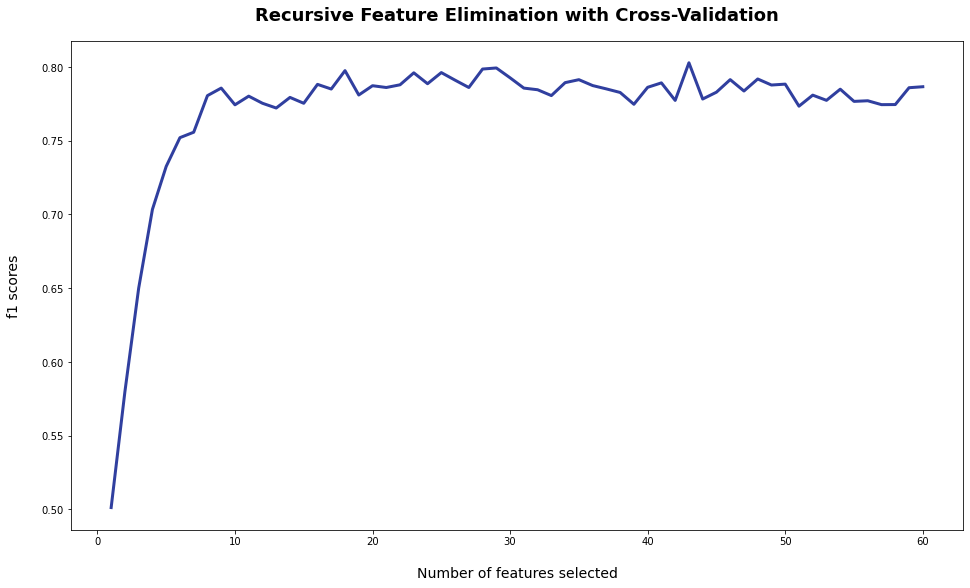

['k9',
 'k12',
 'alcohol_use',
 'k21a',
 'k21b',
 'risk_of_use',
 'risk_of_try',
 'cannabis_access',
 'other_access',
 'doping_access',
 'k66',
 'k68',
 'k72',
 'k1_2',
 'e_cigarette_1',
 'k6_2.0',
 'non_medicide_1',
 'k23a_2.0',
 'k23b_2.0',
 'k23c_2.0',
 'k23d_2.0',
 'k23e_2.0',
 'k23f_2.0',
 'drug_user_friend_1',
 'drug_offer_1',
 'violence_treat_1',
 'employment_1',
 'age_bins_(24, 34]',
 'age_bins_(34, 44]',
 'k3_2.0',
 'k4_2.0',
 'k4_3.0',
 'k5_2.0',
 'k7_3.0',
 'k70a_3.0',
 'k70b_3.0',
 'k70b_4.0',
 'k70c_3.0',
 'k70c_4.0',
 'k70d_3.0',
 'k70d_4.0',
 'k70e_3.0',
 'k70e_4.0']

In [84]:
RFECV_ranking(X_train, y_train)

As seen here, our inbalanced data has a lower f1 score, which indicates we need other techniques to remedy this problem. Please read our summary for further clarification.

### 6.1.4. Step by step with accuracy score


Let’s get a couple of imports out of the way:

- Pipeline — since we’ll perform some cross-validation. It’s best practice in order to avoid data leakage.
- RepeatedStratifiedKFold — for repeated stratified cross-validation.
- cross_val_score — for evaluating the score on cross-validation.
- GradientBoostingClassifier — the estimator we’ll use.
- numpy — so that we can compute the mean of the scores.

The codes were adapted from [Derrick Mwiti post here](https://heartbeat.comet.ml/feature-ranking-with-recursive-feature-elimination-3e22db639208)



In [85]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
import numpy as np


The first step is to create an instance of the RFE class while specifying the estimator and the number of features you’d like to select. In this case, we’re selecting 12:

Next, we create an instance of the model we’d like to use:

In [86]:
from sklearn.ensemble import RandomForestClassifier

rfe_rf = RFE(estimator=RandomForestClassifier(), n_features_to_select=12)

model_rf = RandomForestClassifier(n_estimators=1000, random_state=112)

We’ll use a Pipeline to transform the data. In the Pipeline we specify rfe for the feature selection step and the model that’ll be used in the next step.  

We then specify a RepeatedStratifiedKFold with 10 splits and 5 repeats. The stratified K fold ensures that the number of samples from each class is well balanced in each fold. RepeatedStratifiedKFold repeats the stratified K fold the specified number of times, with a different randomization in each repetition.

In [87]:
pipe_rf = Pipeline([('Feature Selection', rfe_rf), ('Model', model_rf)])
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=36851234)
n_scores = cross_val_score(pipe_rf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
np.mean(n_scores)

0.9527698858854815

The next step is to fit this pipeline to the dataset.

In [97]:
pipe_rf.fit(X_train, y_train)



Pipeline(steps=[('Feature Selection',
                 RFE(estimator=RandomForestClassifier(),
                     n_features_to_select=12)),
                ('Model',
                 RandomForestClassifier(n_estimators=1000, random_state=112))])

With that in place, we can check the support and the ranking. The support indicates whether or not a feature was chosen.

In [98]:
rfe_rf.support_

array([ True,  True,  True, False, False,  True,  True,  True,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False])

We can put that into a dataframe and check the result.

In [99]:
pd.DataFrame(rfe_rf.support_,index=data.columns[1:],columns=['Rank'])



,Rank
k9,True
k12,True
alcohol_use,True
k21a,False
k21b,False
risk_of_use,True
risk_of_try,True
cannabis_access,True
other_access,True
doping_access,False


We can also check the relative rankings.

In [100]:
rf_df = pd.DataFrame(rfe_rf.ranking_,index=data.columns[1:],columns=['Rank']).sort_values(by='Rank',ascending=True)
rf_df.head(10)

,Rank
k9,1
drug_offer_1,1
k70b_4.0,1
k72,1
drug_user_friend_1,1
other_access,1
cannabis_access,1
k23d_2.0,1
risk_of_use,1
alcohol_use,1


### 6.1.5. Automatic feature selection

Instead of manually configuring the number of features, it would be very nice if we could automatically select them. This can be achieved via recursive feature elimination and cross-validation. This is done via the sklearn.feature_selection.RFECV class. The class takes the following parameters:

- estimator — similar to the RFE class.
- min_features_to_select — the minimum number of features to be selected.
- cv— the cross-validation splitting strategy.

**The attributes returned are:**

- n_features_ — the optimal number of features selected via cross-validation.
- support_ — the array containing information on the selection of a feature.
- ranking_ — the ranking of the features.
- grid_scores_ — the scores obtained from cross-validation.

The first step is to import the class and create its instance.



In [101]:
from sklearn.ensemble import RandomForestClassifier

rfecv_rfauto= RFECV(estimator=RandomForestClassifier())

model_rfauto = RandomForestClassifier(n_estimators=100, random_state=92116)

The next step is to specify the pipeline and the cv. In this pipeline we use the just created rfecv.



In [102]:
pipeline_rfauto = Pipeline([('Feature Selection', rfecv_rfauto), ('Model', model_rfauto)])
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=92116)
n_scores = cross_val_score(pipeline_rfauto, X_train_std, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
np.mean(n_scores)

0.9546956320015062

Let’s fit the pipeline and then obtain the optimal number of features.

In [103]:
pipeline_rfauto.fit(X_train_std, y_train)



Pipeline(steps=[('Feature Selection',
                 RFECV(estimator=RandomForestClassifier())),
                ('Model', RandomForestClassifier(random_state=92116))])

In [104]:
rfecv_rfauto.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False, False,  True, False, False, False,  True,  True,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True,  True, False,  True,
        True, False, False,  True,  True,  True])

The optimal number of features can be obtained via the n_features_ attribute.

In [105]:
print('Optimal number of features : %d' % rfecv_rfauto.n_features_)




Optimal number of features : 30


The rankings and support can be obtained just like last time.

In [106]:
rfecv_rfauto.support_rfecv_df = pd.DataFrame(rfecv_rfauto.ranking_,index=data.columns[1:],columns=['Rank']).sort_values(by='Rank',ascending=True)
rfecv_rfauto.support_rfecv_df.head()

,Rank
k9,1
k70d_4.0,1
k70c_4.0,1
k70c_3.0,1
k70b_4.0,1


With the grid_scores_ we can plot a graph showing the cross-validated scores.

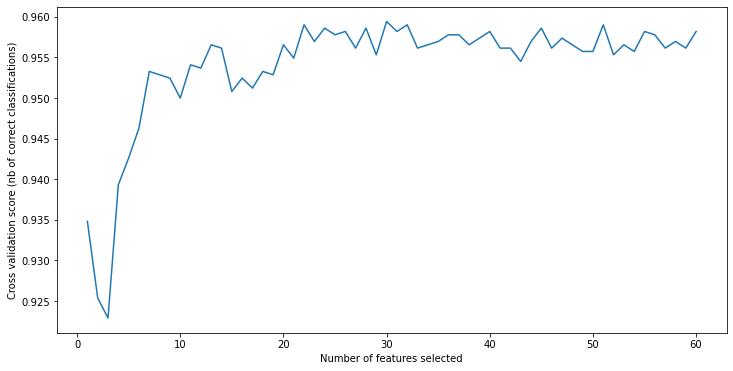

In [107]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score (nb of correct classifications)')
plt.plot(range(1, len(rfecv_rfauto.grid_scores_) + 1), rfecv_rfauto.grid_scores_)
plt.show()

## 6.2. RFE SVC  

We use the same method here and below to just compare the model differences. 

In [108]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification


# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider

rfecv_svc = RFECV(
    estimator=svc,
    step=1,
    cv=StratifiedKFold(5),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv_svc.fit(X_train_std, y_train)

print("Optimal number of features : %d" % rfecv_svc.n_features_)

Optimal number of features : 30


In [109]:
rfecv_svc.support_

array([False, False,  True,  True, False, False,  True,  True, False,
        True,  True,  True, False, False,  True,  True,  True, False,
       False, False,  True, False, False, False,  True,  True, False,
       False,  True,  True,  True,  True, False, False, False, False,
       False, False,  True,  True, False, False, False,  True,  True,
       False, False,  True, False, False,  True,  True,  True, False,
        True, False,  True,  True,  True,  True])

In [110]:
pd.DataFrame(rfecv_svc.support_,index=data.columns[1:],columns=['Rank'])

,Rank
k9,False
k12,False
alcohol_use,True
k21a,True
k21b,False
risk_of_use,False
risk_of_try,True
cannabis_access,True
other_access,False
doping_access,True


In [112]:
rf_df = pd.DataFrame(rfecv_svc.ranking_,index=data.columns[1:],columns=['Rank']).sort_values(by='Rank',ascending=True)
rf_df.head(10)

,Rank
"age_bins_(34, 44]",1
drug_offer_1,1
"age_bins_(24, 34]",1
k70e_3.0,1
"age_bins_(44, 54]",1
"age_bins_(54, 70]",1
k4_3.0,1
k4_4.0,1
drug_user_friend_1,1
k7_2.0,1


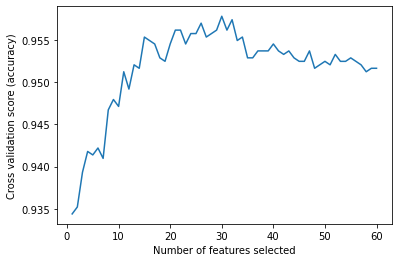

In [113]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv_svc.grid_scores_) + min_features_to_select),
    rfecv_svc.grid_scores_,
)
plt.show()

### 6.2.1. Automatic feature selection with SVC

In [114]:
from sklearn.feature_selection import RFECV
rfecv_SVC = RFECV(estimator=svc)

model = SVC(kernel="linear")

In [115]:
pipeline = Pipeline([('Feature Selection', rfecv_SVC), ('Model', model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=36851234)
n_scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
np.mean(n_scores)

0.9563792754503138

In [116]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('Feature Selection', RFECV(estimator=SVC(kernel='linear'))),
                ('Model', SVC(kernel='linear'))])

In [117]:
print('Optimal number of features : %d' % rfecv_SVC.n_features_)



Optimal number of features : 22


In [118]:
rfecv_SVC.support_rfecv_df = pd.DataFrame(rfecv_SVC.ranking_,index=data.columns[1:],columns=['Rank']).sort_values(by='Rank',ascending=True)
rfecv_SVC.support_rfecv_df.head(10)

,Rank
k70e_4.0,1
drug_offer_1,1
"age_bins_(24, 34]",1
"age_bins_(54, 70]",1
non_medicide_1,1
k6_2.0,1
e_cigarette_1,1
k4_2.0,1
k4_3.0,1
k4_4.0,1


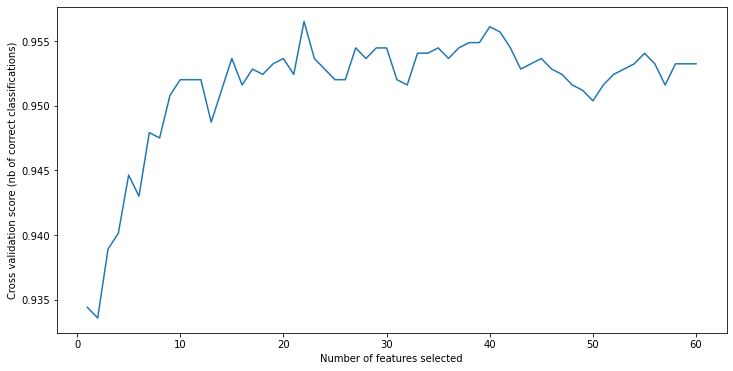

In [119]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score (nb of correct classifications)')
plt.plot(range(1, len(rfecv_SVC.grid_scores_) + 1), rfecv_SVC.grid_scores_)
plt.show()

In [121]:
selected_features = rfecv_SVC.get_support(1)
#X = data[data.columns[selected_features]]

## 6.3. RFE  GradientBoostingClassifier 


In [122]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier

The first step is to create an instance of the RFE class while specifying the estimator and the number of features you’d like to select. In this case, we’re selecting 6:

In [123]:
rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=6)


Next, we create an instance of the model we’d like to use:

In [124]:
model = GradientBoostingClassifier()


Pipeline

In [125]:
pipe = Pipeline([('Feature Selection', rfe), ('Model', model)])
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=36851234)
n_scores = cross_val_score(pipe, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
np.mean(n_scores)

0.9501444104083212

The next step is to fit this pipeline to the dataset.



In [126]:
pipe.fit(X_train, y_train)


Pipeline(steps=[('Feature Selection',
                 RFE(estimator=GradientBoostingClassifier(),
                     n_features_to_select=6)),
                ('Model', GradientBoostingClassifier())])

With that in place, we can check the support and the ranking. The support indicates whether or not a feature was chosen.

In [127]:
rfe.support_

array([ True,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False])

We can put that into a dataframe and check the result.



In [128]:
pd.DataFrame(rfe.support_,index=data.columns[1:],columns=['Rank'])


,Rank
k9,True
k12,True
alcohol_use,False
k21a,False
k21b,False
risk_of_use,False
risk_of_try,True
cannabis_access,False
other_access,False
doping_access,False


We can also check the relative rankings.



In [129]:
rf_df = pd.DataFrame(rfe.ranking_,index=data.columns[1:],columns=['Rank']).sort_values(by='Rank',ascending=True)
rf_df.head(10)


,Rank
k9,1
k23d_2.0,1
k70b_4.0,1
risk_of_try,1
drug_user_friend_1,1
k12,1
non_medicide_1,2
drug_offer_1,3
cannabis_access,4
risk_of_use,5


### 6.3.1. Automatic Feature Selection


The first step is to import the class and create its instance.



In [130]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=GradientBoostingClassifier())


The next step is to specify the pipeline and the cv. In this pipeline we use the just created rfecv.



In [131]:
pipeline = Pipeline([('Feature Selection', rfecv), ('Model', model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=36851234)
n_scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
np.mean(n_scores)

0.9574438372799028

Let’s fit the pipeline and then obtain the optimal number of features.



In [132]:
pipeline.fit(X_train,y_train)


Pipeline(steps=[('Feature Selection',
                 RFECV(estimator=GradientBoostingClassifier())),
                ('Model', GradientBoostingClassifier())])

The optimal number of features can be obtained via the n_features_ attribute.



In [133]:
print('Optimal number of features : %d' % rfecv.n_features_)


Optimal number of features : 15


The rankings and support can be obtained just like last time.



In [134]:
rfecv.support_rfecv_df = pd.DataFrame(rfecv.ranking_,index=data.columns[1:],columns=['Rank']).sort_values(by='Rank',ascending=True)
rfecv.support_rfecv_df.head(15)

,Rank
k9,1
drug_offer_1,1
drug_user_friend_1,1
k23d_2.0,1
k70b_3.0,1
k70b_4.0,1
non_medicide_1,1
k6_2.0,1
doping_access,1
k70c_4.0,1


With the grid_scores_ we can plot a graph showing the cross-validated scores.



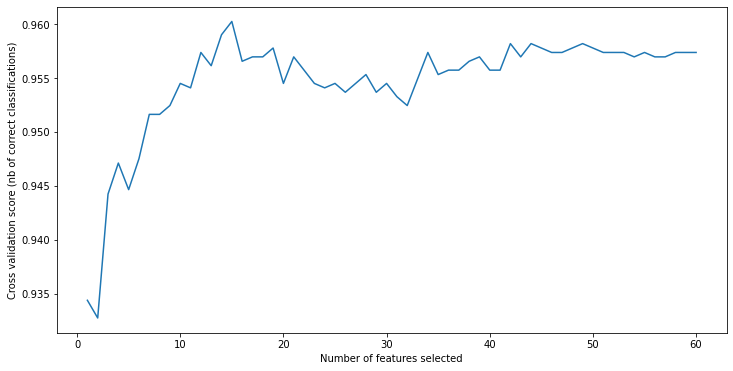

In [135]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score (nb of correct classifications)')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

# 7. Summary
- Here, we illustrate very different strategies to select features. Depending on the method, the rank and the list of the features vary. If you know the data well or similiar with the field, you can evaluate which method produces better explainable features for the analysis. I will discuss more in details in the next section why I prefer one to another for this drug survey data. 
- The accuracy scores are satisfactory in these models to select features but the main problem is imbalance data, which indicates we need to apply oversampling or downsampling techniques. 
- Since our label data are very rare (around 3,5%), it would be wise to select upsampling strategy, but we will compare their results in the next section. 
- it is still promising that with around 10-15 indicators, we can predict how likely a person use cannabis. I particularly select features representing the daily life of individuals, in terms of his/her perception about the health risks of drug use, accessibility to drugs, control variables such as gender, marriage status, having a child, etc.

If you have any suggestions or questions, please feel free to share


